In [1]:
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from datetime import datetime
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

In [2]:
# # use for google Colab

# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
# use for google Colab
# !ls /content/drive/MyDrive/Regex_CNN_Project/dataset # check the folder TRAIN and TEST show using ls / dir  

In [4]:
# use for google Colab
# !cd /content/drive/MyDrive/Regex_CNN_Project

In [5]:
# data_dir = '/content/drive/MyDrive/Regex_CNN_Project/dataset/' # use for google Colab
data_dir = './dataset/'
train_dir = data_dir + 'TRAIN'
test_dir = data_dir + 'TEST'
# parameters
img_width, img_height = 224, 224  # dimensions to which the images will be resized
batch_size = 32
num_epochs = 32
num_classes = 6  #categories of trash

In [6]:
from keras_preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1.0/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True,rotation_range=30, validation_split=0.2,
width_shift_range=0.2, height_shift_range=0.2)
test_data_gen = ImageDataGenerator(rescale=1.0/255)
   

In [7]:
train_data = train_data_gen.flow_from_directory(train_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical",subset='training')

valid_data = train_data_gen.flow_from_directory(train_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical",subset='validation')

test_data = test_data_gen.flow_from_directory(test_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical")


Found 1603 images belonging to 6 classes.
Found 398 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [8]:
train_data.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [9]:
train_data.image_shape

(224, 224, 3)

In [10]:
def timer(start_time=None):
    if not start_time:
        print(datetime.now())
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [11]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(input_shape = input_shape, weights = "imagenet", include_top = False)
for layer in vgg16.layers:
  layer.trainable = False

In [13]:

x = layers.Flatten()(vgg16.output)
# now let's add output layers or prediction layer

prediction = layers.Dense(units = num_classes, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])
start_time=timer(None)
result = model.fit(train_data, validation_data=valid_data, epochs = num_epochs, steps_per_epoch=len(train_data))
timer(start_time)

2021-07-17 10:41:07.673318
Epoch 1/32
51/51 [==============================] - 151s 3s/step - loss: 1.3655 - accuracy: 0.4810 - val_loss: 1.0636 - val_accuracy: 0.5955
Epoch 2/32
51/51 [==============================] - 146s 3s/step - loss: 0.9696 - accuracy: 0.6263 - val_loss: 0.9440 - val_accuracy: 0.6307
Epoch 3/32
51/51 [==============================] - 137s 3s/step - loss: 0.7841 - accuracy: 0.7024 - val_loss: 0.8981 - val_accuracy: 0.6633
Epoch 4/32
51/51 [==============================] - 155s 3s/step - loss: 0.7485 - accuracy: 0.7155 - val_loss: 1.1613 - val_accuracy: 0.5754
Epoch 5/32
51/51 [==============================] - 156s 3s/step - loss: 0.7212 - accuracy: 0.7324 - val_loss: 0.9266 - val_accuracy: 0.6709
Epoch 6/32
51/51 [==============================] - 162s 3s/step - loss: 0.7250 - accuracy: 0.7243 - val_loss: 0.9610 - val_accuracy: 0.6709
Epoch 7/32
51/51 [==============================] - 148s 3s/step - loss: 0.6743 - accuracy: 0.7511 - val_loss: 0.9184 - val_acc

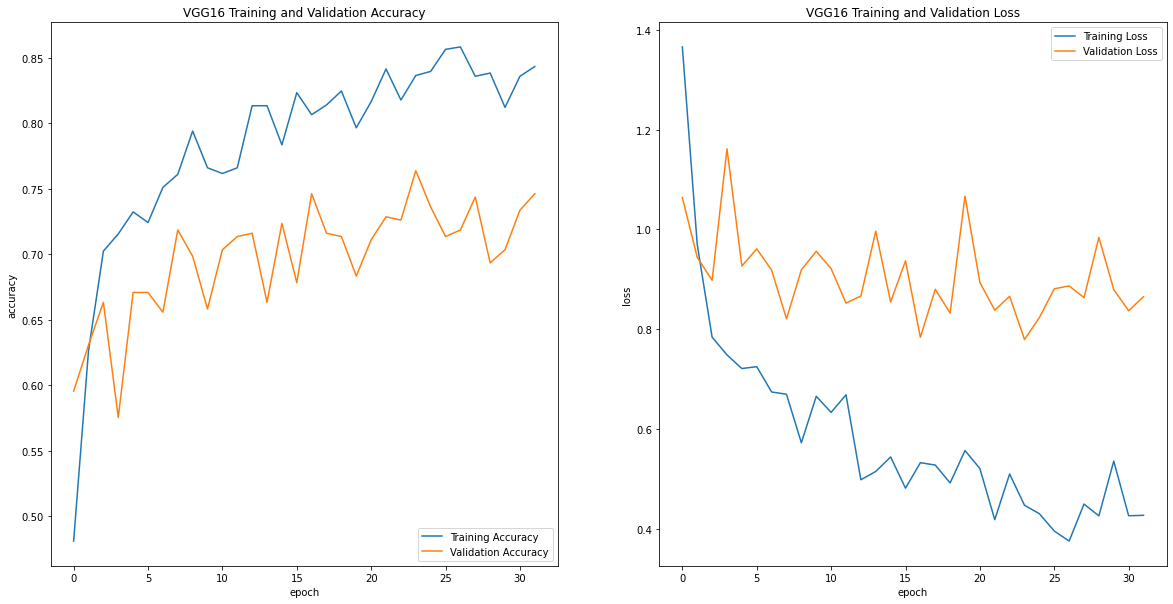

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("VGG16 Training and Validation Accuracy")
plt.plot(result.history["accuracy"], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.plot( result.history["loss"], label='Training Loss')
plt.plot( result.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('VGG16 Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [17]:
model.save('project_vgg.h5')